In [52]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#library 
from src.viz import data_overview

In [53]:
#path
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
product_cat_name = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/products_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")

In [ ]:
customers

In [ ]:
geolocation

In [ ]:
order_items

In [ ]:
order_payments

In [ ]:
order_reviews

In [ ]:
orders

In [ ]:
product_cat_name

In [ ]:
products

In [ ]:
sellers

In [ ]:
order_payments

In [ ]:
orders

In [54]:
data = [customers, geolocation, orders, order_items, order_payments, 
        order_reviews, product_cat_name, products, sellers ]

In [55]:
data_names = ['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 
         'order_reviews', 'product_cat_name', 'products', 'sellers' ]

In [56]:
df = pd.DataFrame({})

In [57]:
df['datasets'] = data_names
df['rows'] = [df.shape[0] for df in data]
df['column'] = [df.shape[1] for df in data]

In [ ]:
df

In [59]:
df_overview = pd.DataFrame({})
name_col = []
for name, df in zip(data_names, data):
    name_col += [name] * df.shape[1]
    df_temp = data_overview(df)
    df_overview = pd.concat([df_overview, df_temp], ignore_index=True)

# print(df_overview)
df_overview['datasets'] = name_col
df_overview

cols = df_overview.columns.tolist()
cols.insert(0, cols.pop(cols.index('datasets')))
df_overview = df_overview.reindex(columns=cols)
df_overview

,datasets,feature,qtd_null,percent_null,dtype,qtd_cat
0,customers,customer_id,0,0.000000,object,99441
1,customers,customer_unique_id,0,0.000000,object,96096
2,customers,customer_zip_code_prefix,0,0.000000,int64,0
3,customers,customer_city,0,0.000000,object,4119
4,customers,customer_state,0,0.000000,object,27
5,geolocation,geolocation_zip_code_prefix,0,0.000000,int64,0
6,geolocation,geolocation_lat,0,0.000000,float64,0
7,geolocation,geolocation_lng,0,0.000000,float64,0
8,geolocation,geolocation_city,0,0.000000,object,8011
9,geolocation,geolocation_state,0,0.000000,object,27


# let's do segmentation

In [24]:
# gabungkan customer id dan order

In [60]:
df_orders = pd.merge(customers, orders, how ='left', on='customer_id')
df_orders = pd.merge(df_orders, order_items,how ='left', on='order_id')
df_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [61]:
col = ['customer_unique_id', 'price', 'order_item_id', 'order_purchase_timestamp']
df_orders = df_orders[col]

In [62]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])


/tmp/ipykernel_193880/914401677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])


In [ ]:
df_orders.isnull().sum()

In [ ]:
data_max = pd.to_datetime(df_orders['order_purchase_timestamp'].max())
data_min = df_orders['order_purchase_timestamp'].min()
total = (data_max - data_min).total_seconds()
print('Data terakhir: ' + str(data_max))
print('Data pertama : ' + str(data_min)) 

In [ ]:
total_year = total / (3600 * 24 * 365)
total_month = total / (3600 * 24 * 30)
print(str(round(total_month)) + ' months')
print(str(round(total_year)) + ' years')

In [ ]:
df_orders

In [ ]:
df_orders_uniq = pd.DataFrame(df_orders['customer_unique_id'].unique())
df_orders_uniq.columns = ['customer_unique_id']
df_orders_uniq

# Recency

In [ ]:
order_lastpurchase = df_orders.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
order_lastpurchase.columns = ['customer_unique_id','last_purchase_date']
order_lastpurchase['Recency'] = (order_lastpurchase['last_purchase_date'].max() - order_lastpurchase['last_purchase_date']).dt.days
df_orders_rec = pd.merge(df_orders_uniq, order_lastpurchase[['customer_unique_id','Recency']], on='customer_unique_id')
df_orders_rec

# frequency 

In [ ]:
df_orders_freq = df_orders.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_orders_freq.columns = ['customer_unique_id','Frequency']
df_orders_freq = pd.merge(df_orders_uniq, df_orders_freq, on='customer_unique_id')
df_orders_freq

# Monetary

In [ ]:
df_orders.loc[:, 'Monetary'] = df_orders.loc[:, 'price'] * df_orders.loc[:, 'order_item_id']
df_monetary = df_orders.groupby('customer_unique_id').Monetary.sum().reset_index()
df_monetary = pd.merge(df_orders_uniq, df_monetary, on='customer_unique_id')

In [ ]:
df_monetary

# Merge

In [ ]:
df_frm = df_orders_rec.merge(df_orders_freq, on='customer_unique_id').merge(df_monetary, on='customer_unique_id')
df_frm

In [ ]:
df_frm

In [ ]:
df_frm['Frequency'].value_counts()

In [ ]:
print(df_frm.describe())

In [ ]:
sns.displot(df_frm['Recency'], kde=True)
sns.displot(df_frm['Frequency'], kde=True)


In [ ]:
sns.displot(df_frm['Monetary'])
plt.show()

In [ ]:
"""
The distribution visualization of the data shows that the Frequency and Monetary features are 
skewed, with a high proportion of the data concentrated at one end. Due to this, machine learning
models may not be suitable for clustering and segmentation. Quantile-based and rank-based 
segmentation methods are also not ideal. Quantile cut would divide most of the Frequency data 
points with a value of 1 into multiple segments, while rank-based cut would not work well due 
to the large range of Monetary feature causing it to remain highly skewed. Therefore, a rule-
based segmentation method will be used, 

"""
# if else based rule will be implemented to segment the customers
#https://github.com/gstdl/e-commerce-Customer-RFM-Analysis/blob/master/rfm-analysis.ipynb

In [ ]:
def boxplot(df, title):
    plt.figure(figsize=(15,3))
    plt.title('Outliers of ' + title)
    sns.boxplot(x=df, color='red')
    plt.show()


In [ ]:
boxplot(df_frm['Recency'], 'Recency')
boxplot(df_frm['Frequency'],'Frequency')
boxplot(df_frm['Monetary'],'Monetary')

In [146]:
df_frm.describe()

,Recency,Frequency,Monetary
count,96096.000000,96096.000000,96096.000000
mean,287.735691,1.180330,160.232878
std,153.414676,0.620748,371.165615
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,47.900000
50%,268.000000,1.000000,89.900000
75%,397.000000,1.000000,166.800000
max,772.000000,24.000000,60480.000000


In [277]:
r_labels = range(5, 0, -1)
m_labels = range(1, 6)


In [278]:
r_groups = pd.qcut(df_frm['Recency'], q=5, labels=r_labels)

In [279]:
m_groups = pd.qcut(df_frm['Monetary'], q=5, labels=m_labels)

In [ ]:
m_groups

In [272]:
def segmen_frec(x):
    if x == 1:
        return 1
    elif x <= 4 and x > 1:
        return 2
    elif x <= 6 and x > 4:
        return 3
    elif x <= 8 and x > 6:
        return 4
    else:
        return 5

In [280]:
f_groups = df_frm['Frequency'].apply(lambda x: segmen_frec(x)).astype('category')

In [281]:
df_frm_new = df_frm.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

In [282]:
df_frm_new['RFM_Score'] = df_frm_new[['R','F','M']].sum(axis=1)
df_frm_new.head(10)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,861eff4711a542e4b93843c6dd7febb0,519,1,124.99,1,1,4,6
1,290c77bc529b7ac935b93aa66c333dc3,277,1,289.00,3,1,5,9
2,060e732b5b29e8181a18229c7b0b2b5e,151,1,139.94,4,1,4,9
3,259dac757896d24d7702b9acbbff3f3c,218,1,149.94,4,1,4,9
4,345ecd01c38d18a9036ed96c73b8d066,80,1,230.00,5,1,5,11
5,4c93744516667ad3b8f1fb645a3116a4,367,2,506.52,2,2,5,9
6,addec96d2e059c80c30fe6871d30d177,240,1,14.99,3,1,1,5
7,57b2a98a409812fe9618067b6b8ebe4f,334,1,19.90,2,1,1,4
8,1175e95fb47ddff9de6b2b06188f7e0d,272,2,54.99,3,2,2,7
9,9afe194fb833f79e300e37e580171f22,282,1,99.90,3,1,3,7


In [283]:
df_frm_new.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
})/ round(1)

Recency  Frequency     Monetary         
                 mean       mean         mean    count
RFM_Score                                             
3          527.742097   1.000000    24.281452   4207.0
4          443.036178   1.009176    39.962230   7629.0
5          381.576702   1.023942    55.462889  11486.0
6          330.716657   1.040972    75.710365  14156.0
7          278.909368   1.067932   132.838783  17709.0
8          245.212703   1.177638   185.512536  15115.0
9          199.376270   1.277422   222.281013  11715.0
10         158.046778   1.370569   293.894686   8209.0
11         124.494843   1.645657   448.924226   4363.0
12         106.461310   2.767857   618.898237   1344.0
13         125.533333   6.333333  1674.635250    120.0
14         147.071429   9.178571  2935.924286     28.0
15         104.533333  11.800000  2348.450000     15.0

In [294]:
def segmen_score(x):
    if x >= 13:
        return 'Platinum'
    elif x < 13 and x >= 10:
        return 'Gold'
    elif x < 10 and x >= 7:
        return 'Silver'
    else:
        return 'Bronze'

In [295]:
df_frm_new['General_Segment'] = df_frm_new['RFM_Score'].apply(segmen_score)

In [296]:
df_frm_new

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,General_Segment
0,861eff4711a542e4b93843c6dd7febb0,519,1,124.99,1,1,4,6,Bronze
1,290c77bc529b7ac935b93aa66c333dc3,277,1,289.00,3,1,5,9,Silver
2,060e732b5b29e8181a18229c7b0b2b5e,151,1,139.94,4,1,4,9,Silver
3,259dac757896d24d7702b9acbbff3f3c,218,1,149.94,4,1,4,9,Silver
4,345ecd01c38d18a9036ed96c73b8d066,80,1,230.00,5,1,5,11,Gold
...,...,...,...,...,...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,193,1,74.90,4,1,3,8,Silver
96092,d52a67c98be1cf6a5c84435bd38d095d,196,1,114.90,4,1,3,8,Silver
96093,e9f50caf99f032f0bf3c55141f019d99,191,1,37.00,4,1,1,6,Bronze
96094,73c2643a0a458b49f58cea58833b192e,347,1,689.00,2,1,5,8,Silver


In [298]:
df_frm_new.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
}).round(1)

Recency Frequency Monetary       
                   mean      mean     mean  count
General_Segment                                  
Bronze            391.3       1.0     56.5  37478
Gold              142.5       1.6    373.9  13916
Platinum          127.3       7.3   1953.3    163
Silver            246.6       1.2    174.2  44539

In [ ]:
# clustering preparation

In [300]:
df_frm.describe()

,Recency,Frequency,Monetary
count,96096.000000,96096.000000,96096.000000
mean,287.735691,1.180330,160.232878
std,153.414676,0.620748,371.165615
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,47.900000
50%,268.000000,1.000000,89.900000
75%,397.000000,1.000000,166.800000
max,772.000000,24.000000,60480.000000


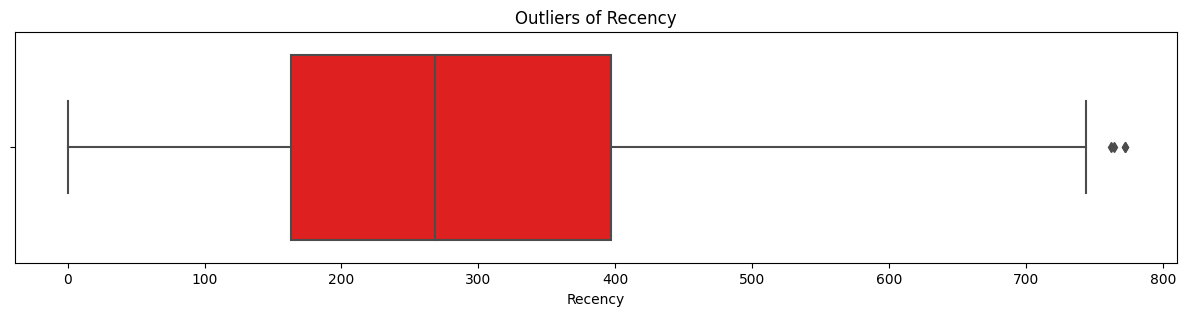

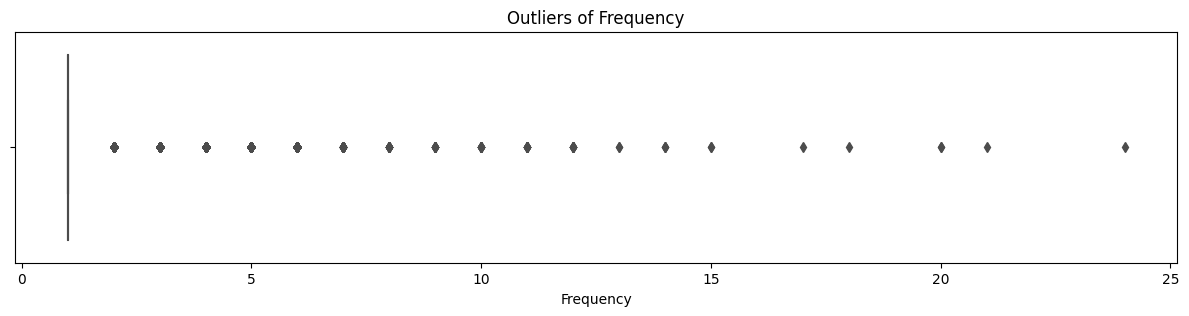

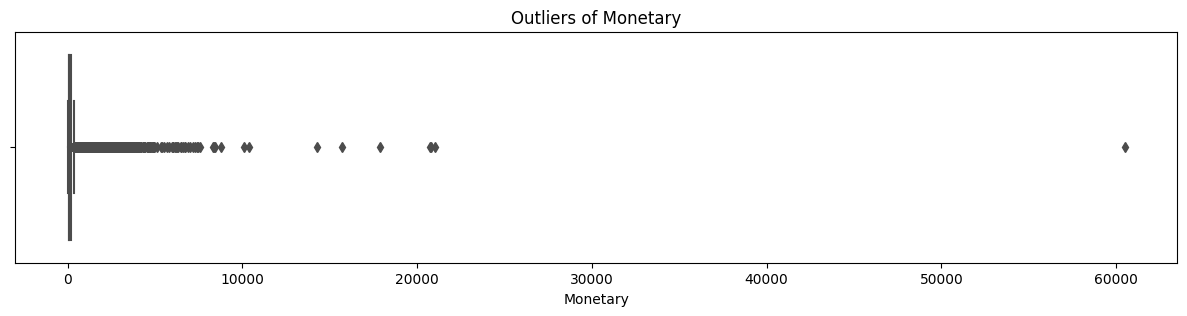

In [301]:
boxplot(df_frm['Recency'], 'Recency')
boxplot(df_frm['Frequency'],'Frequency')
boxplot(df_frm['Monetary'],'Monetary')

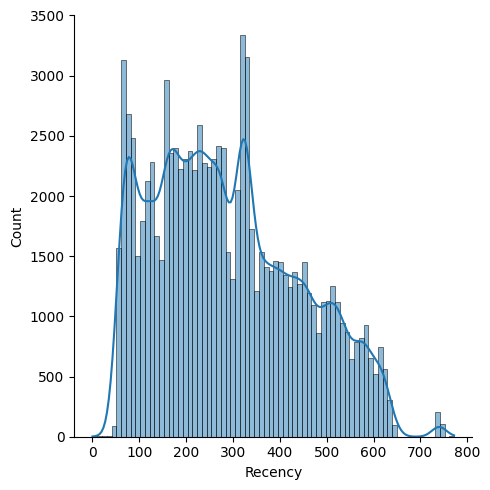

In [303]:
sns.displot(df_frm['Recency'], kde=True)
plt.show()

In [299]:
#effect outlier on kmeans
#https://medium.com/analytics-vidhya/effect-of-outliers-on-k-means-algorithm-using-python-7ba85821ea23